In [69]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

from scipy import stats
from scipy.stats import boxcox

In [2]:
# Loading our data
df = pd.read_csv("../data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Analisis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

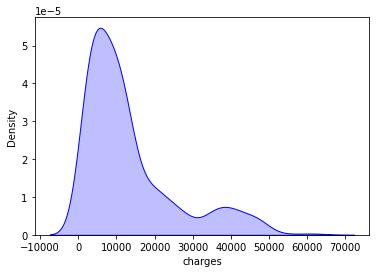

In [5]:
sns.distplot(
    df.charges, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [6]:
df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


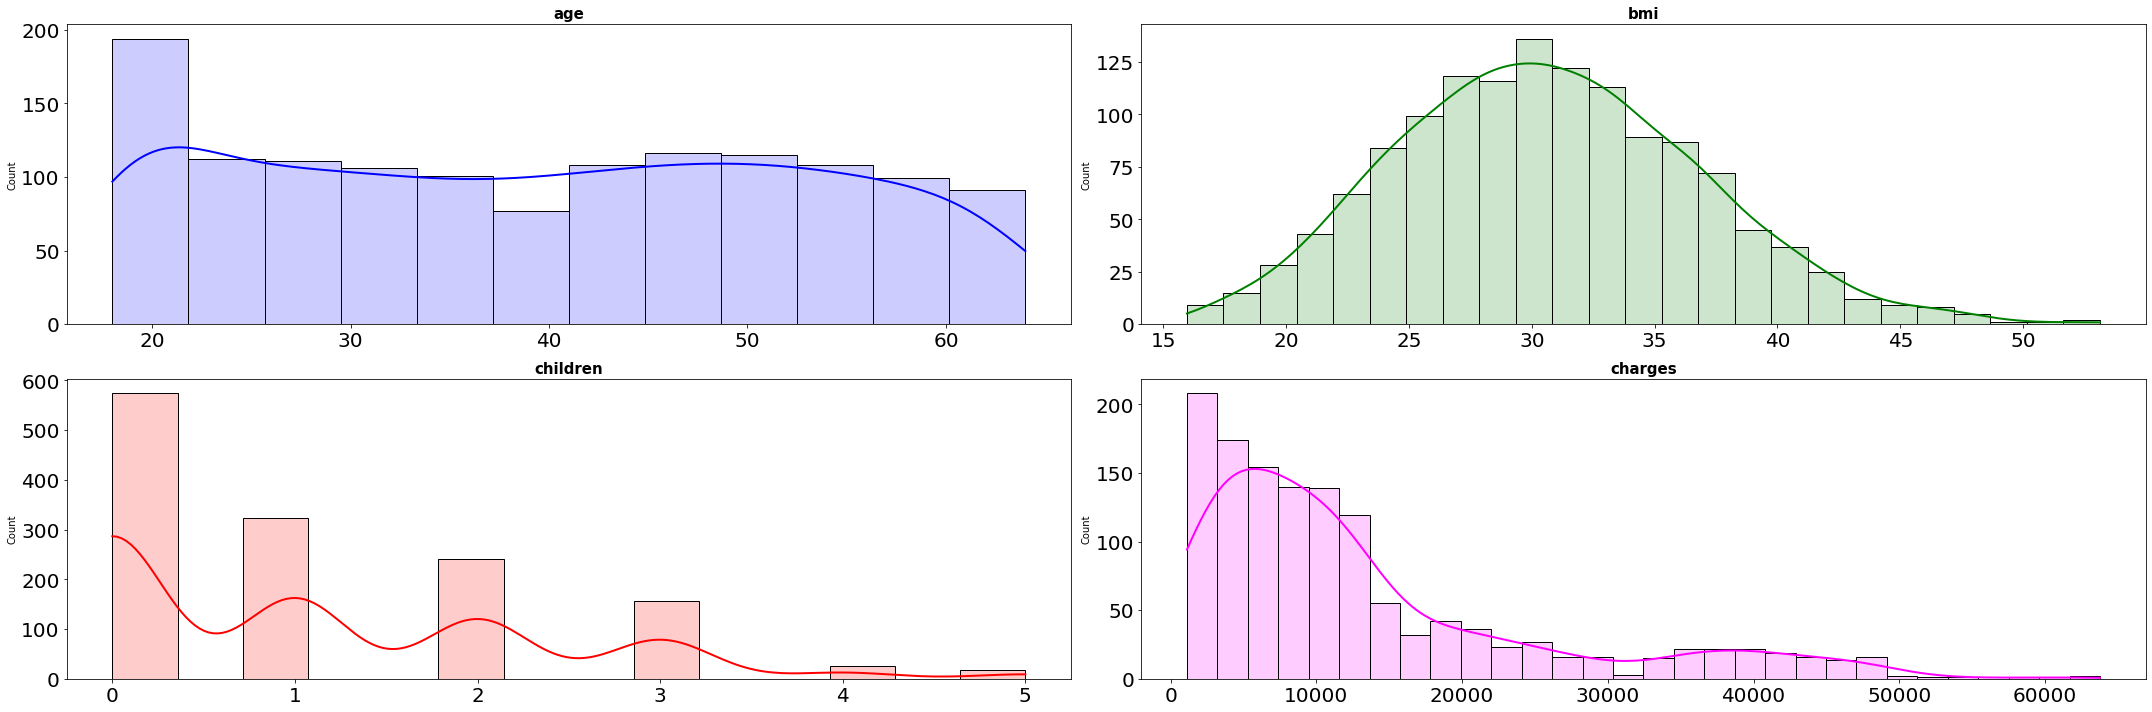

In [7]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "magenta"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();
    

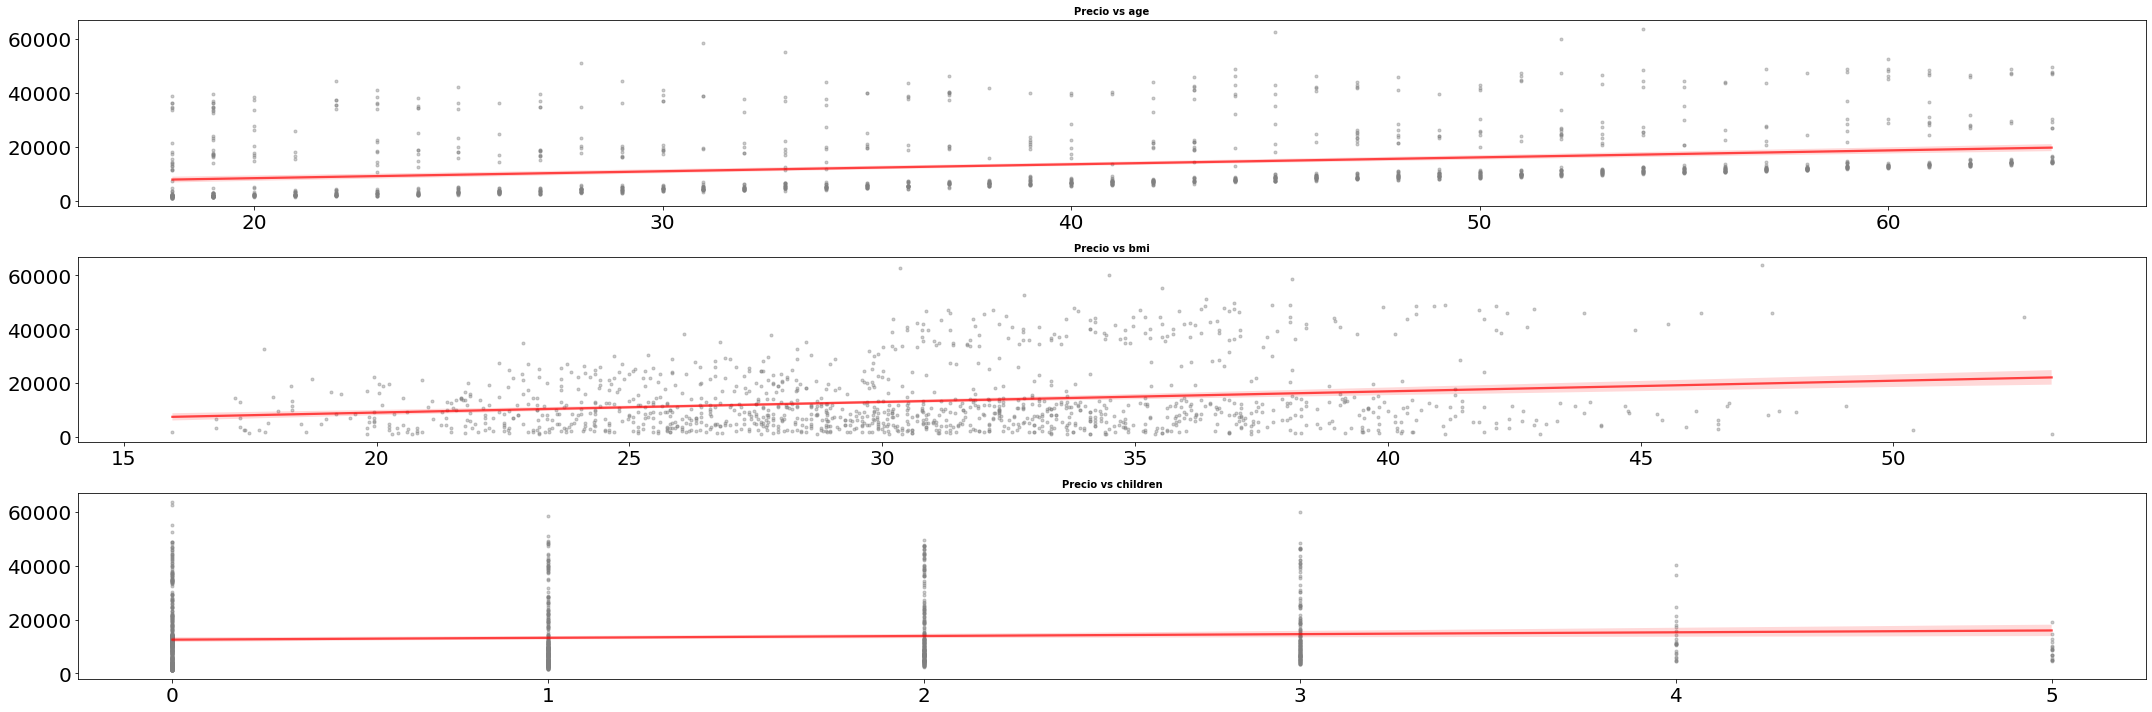

In [8]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]
axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

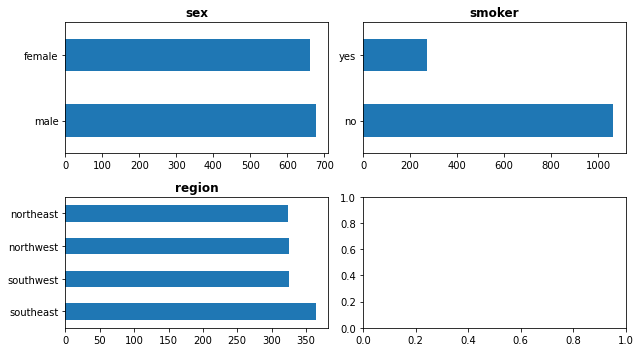

In [9]:

fig, axes = plt.subplots(2, 2, figsize = (9,5))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

In [10]:
df.drop(["sex","region"],axis = 1, inplace = True)

In [11]:
df_smo = df[df["smoker"] == "yes"]
df_no = df[df["smoker"] != "yes"]
df_smo.head()

,age,bmi,children,smoker,charges
0,19,27.90,0,yes,16884.9240
11,62,26.29,0,yes,27808.7251
14,27,42.13,0,yes,39611.7577
19,30,35.30,0,yes,36837.4670
23,34,31.92,1,yes,37701.8768


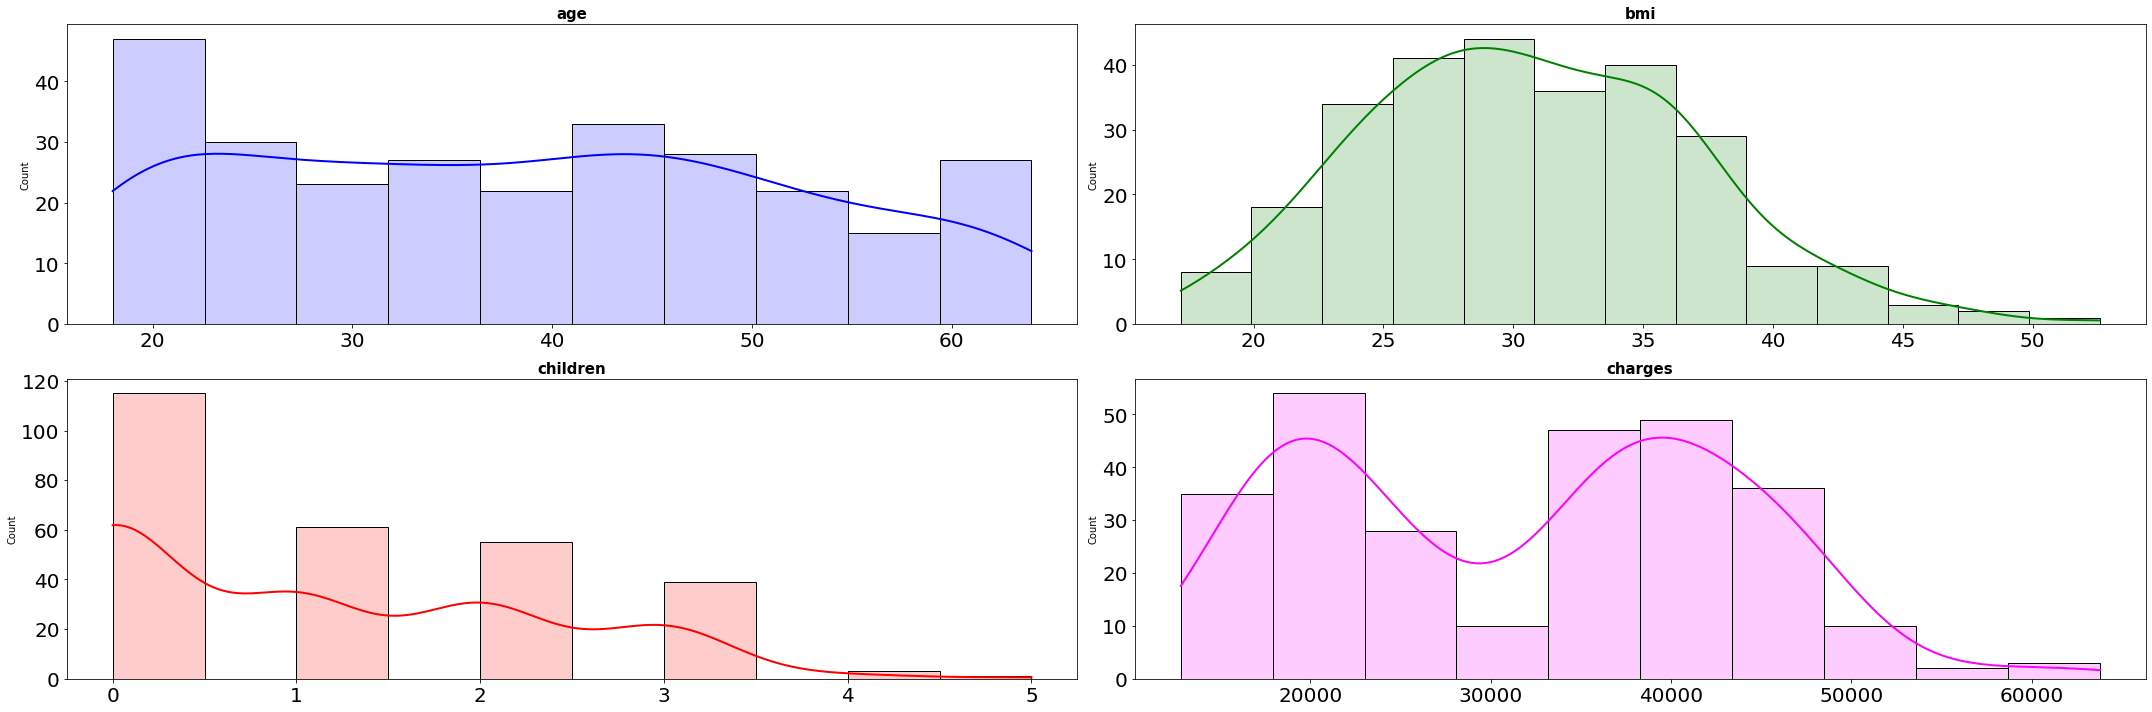

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "magenta"]

axes = axes.flat

columnas_numeric = df_smo.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_smo,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

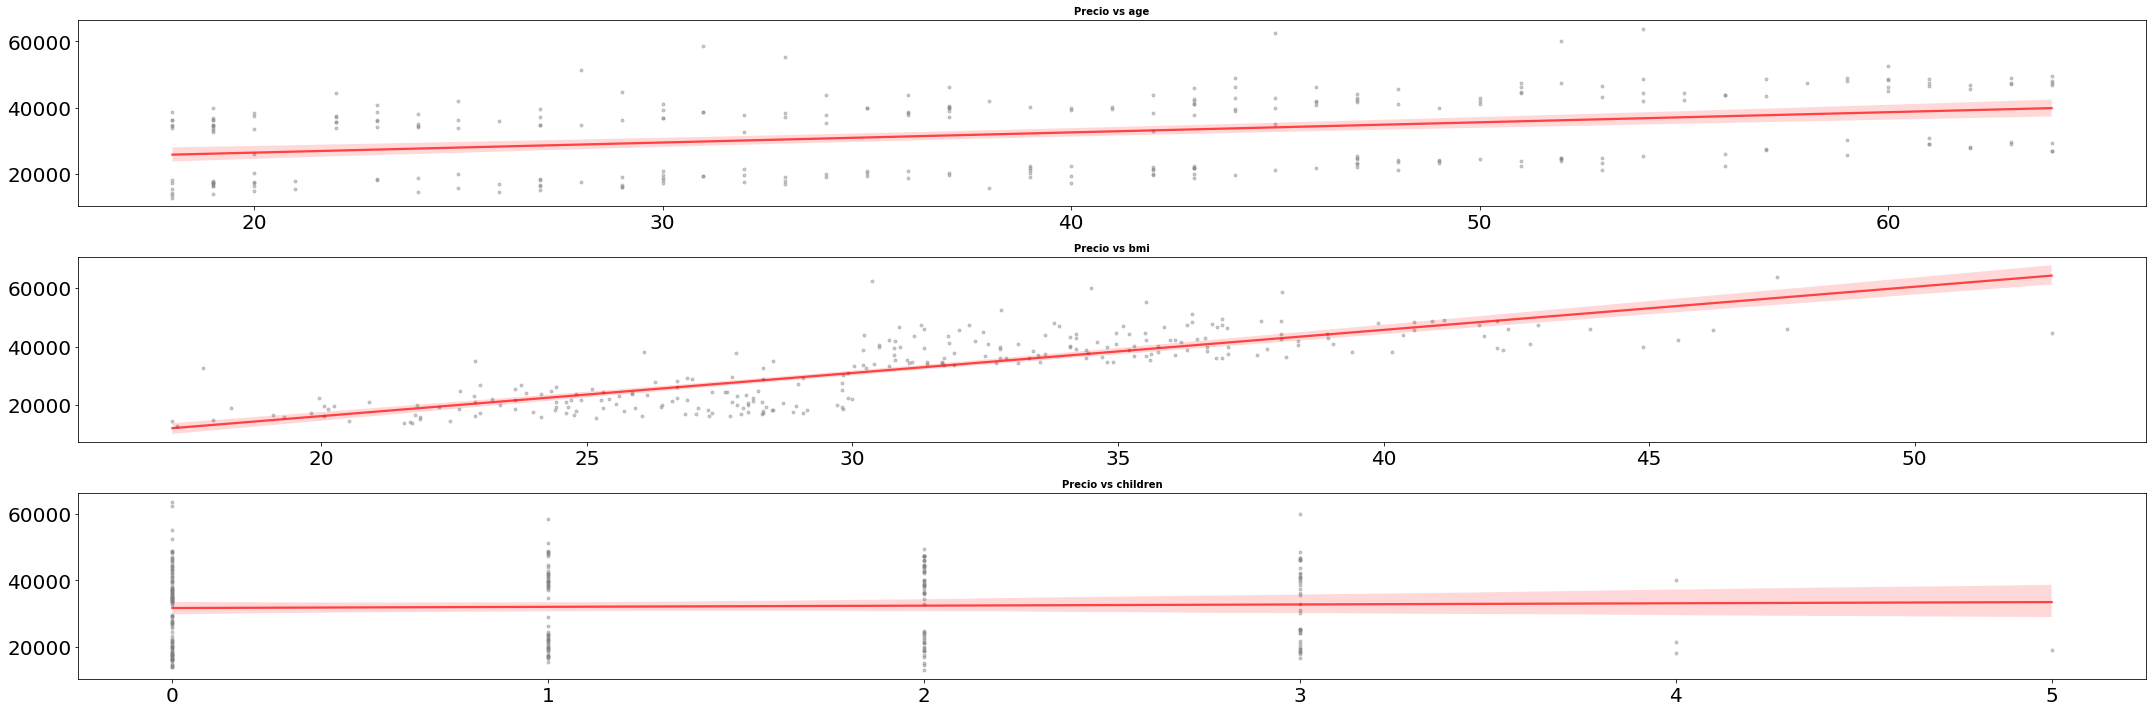

In [13]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_smo.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_smo[colum], 
        y = df_smo["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

In [14]:
df_smo_hbmi = df_smo[df_smo["bmi"] > 30]
df_smo_lbmi = df_smo[df_smo["bmi"] <= 30]

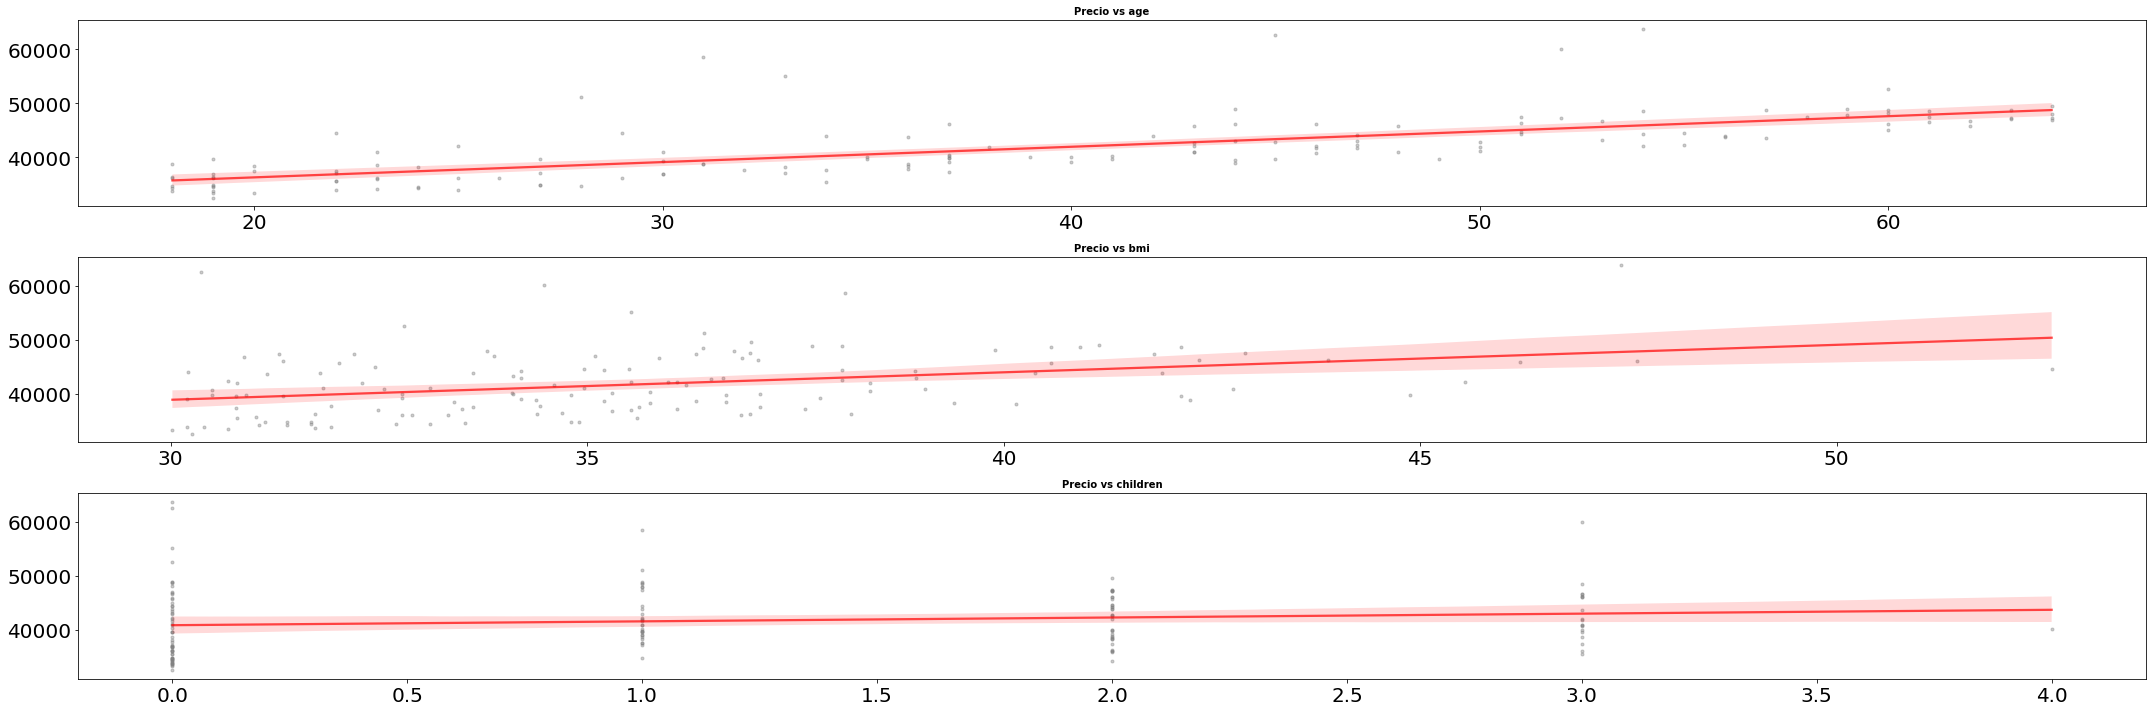

In [15]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_smo_hbmi.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_smo_hbmi[colum], 
        y = df_smo_hbmi["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

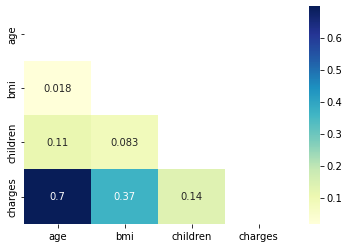

In [16]:
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
sns.heatmap(df_smo_hbmi.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

In [17]:
df_smo_hbmi.drop(["smoker"], axis = 1, inplace = True)

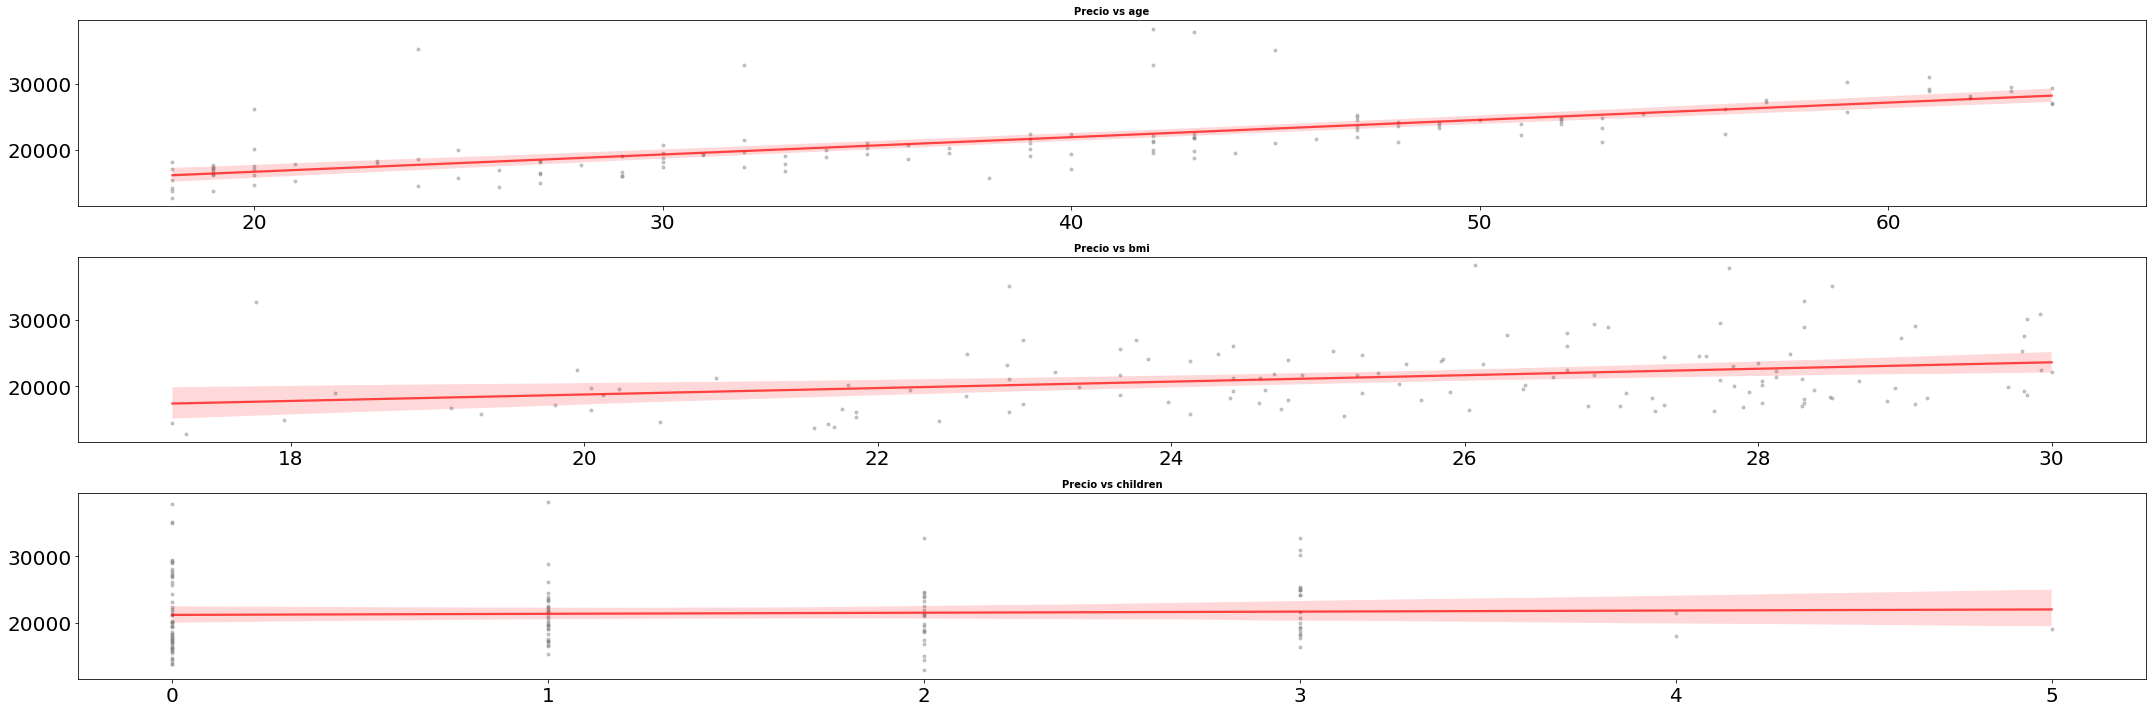

In [18]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_smo_lbmi.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_smo_lbmi[colum], 
        y = df_smo_lbmi["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

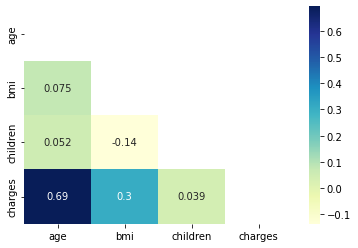

In [19]:
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
sns.heatmap(df_smo_lbmi.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

In [20]:
df_smo_lbmi.drop(["smoker", "children"], axis = 1, inplace = True)

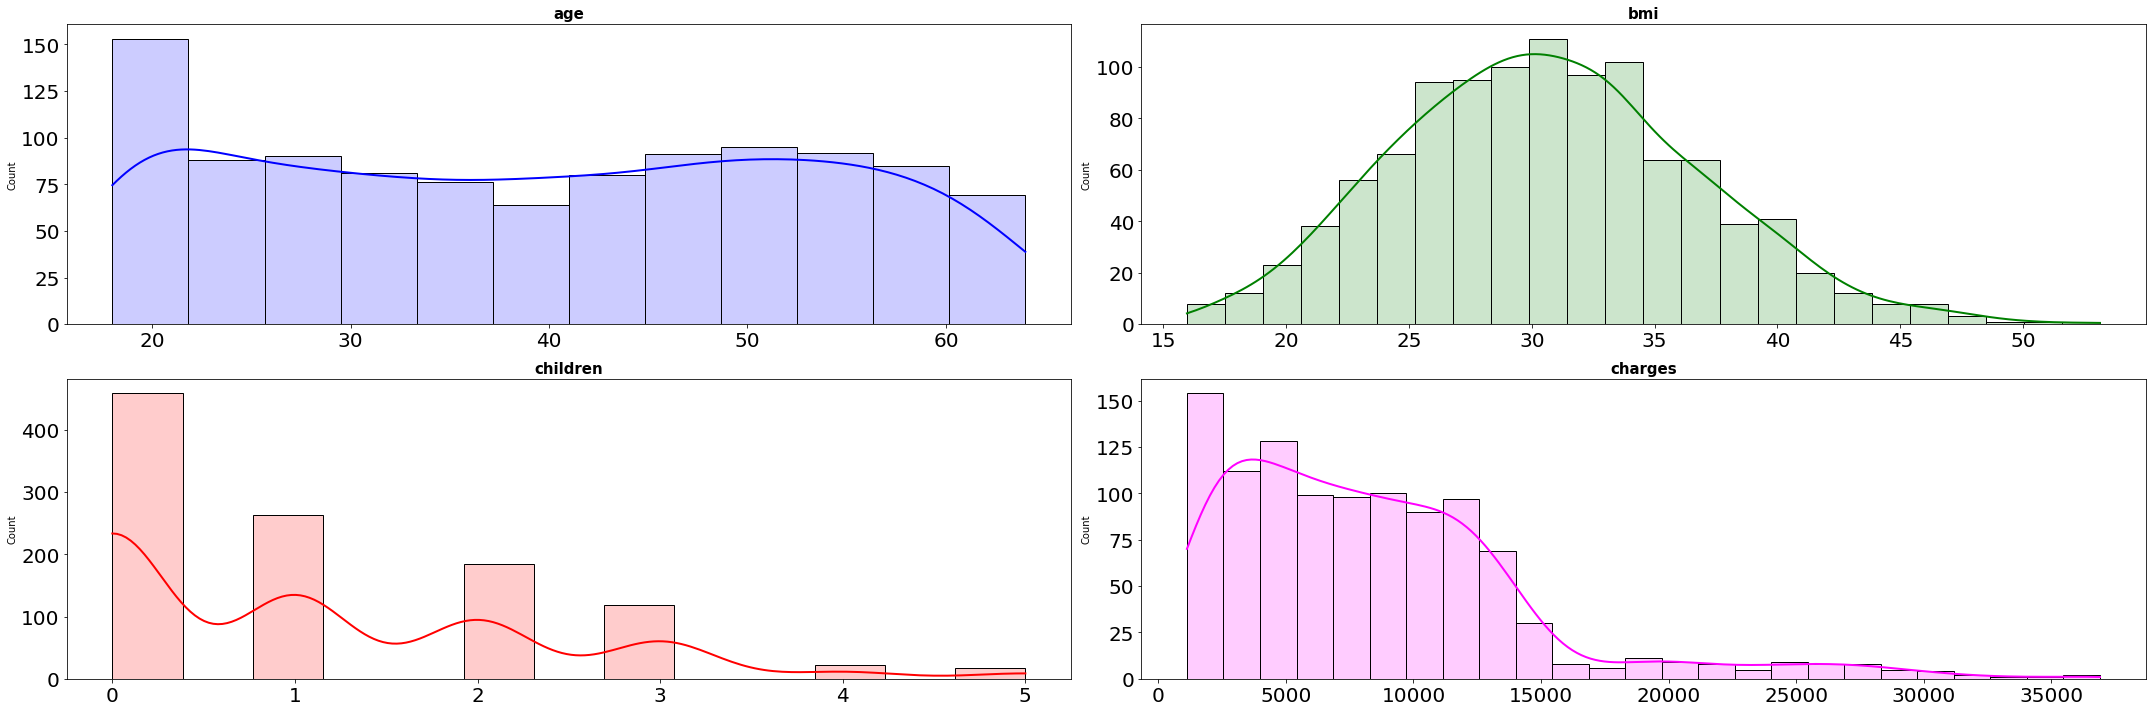

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "magenta"]

axes = axes.flat

columnas_numeric = df_no.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_no,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

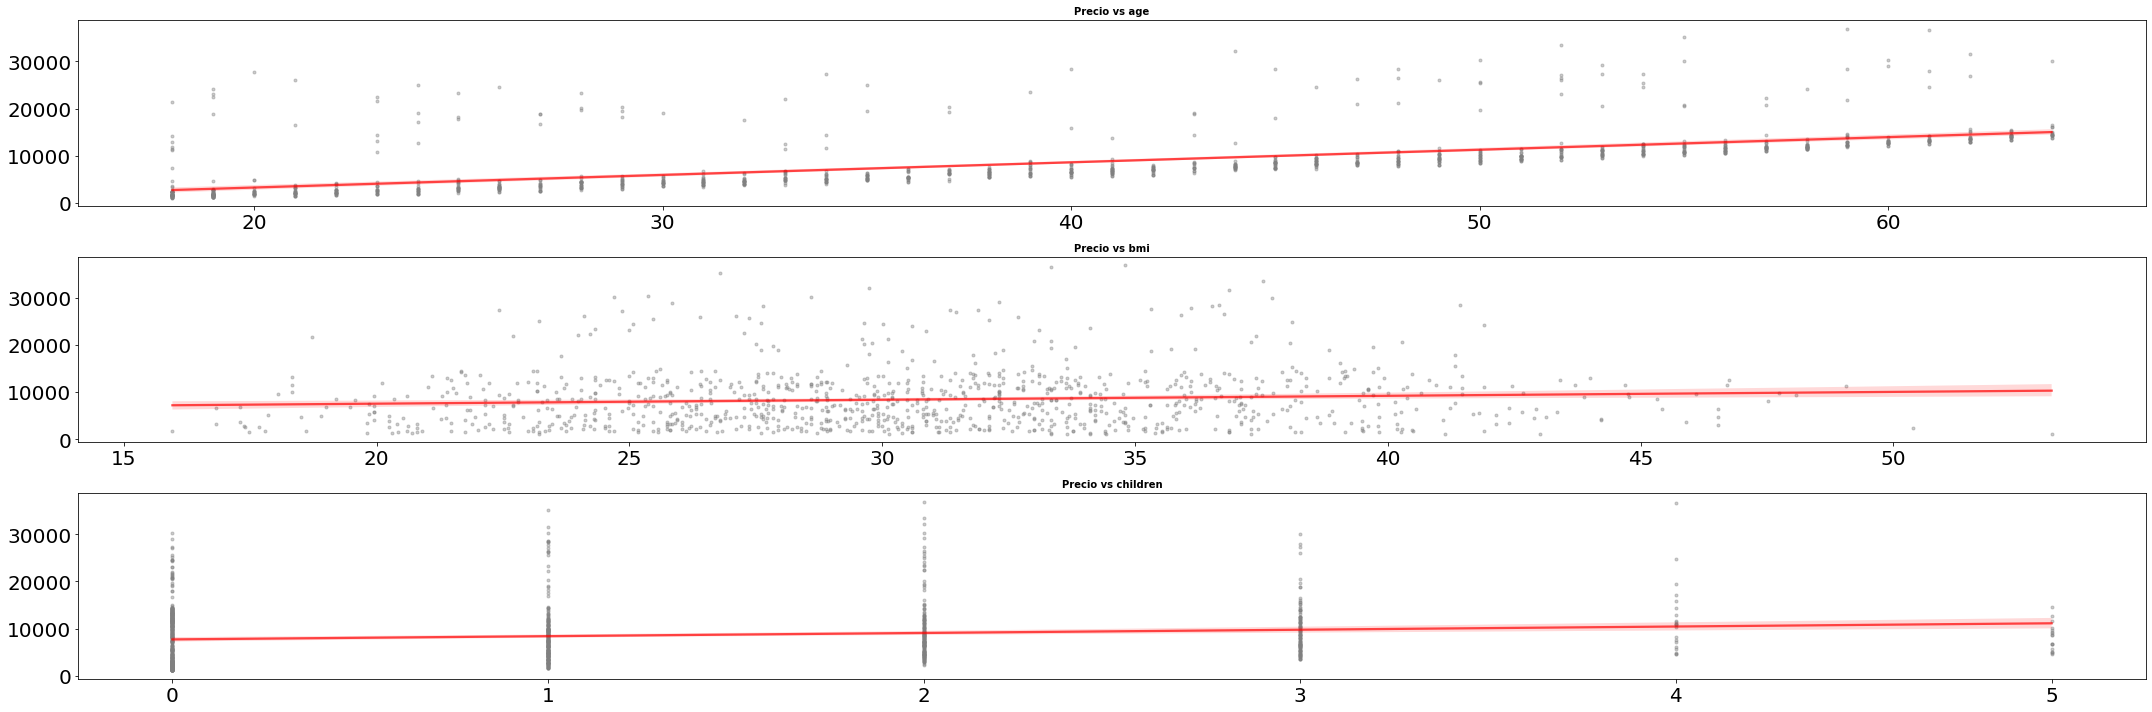

In [22]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_no.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_no[colum], 
        y = df_no["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

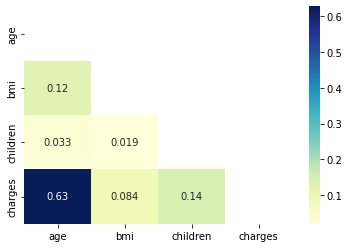

In [23]:
sns.heatmap(df_no.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

In [24]:
df_no.drop(["smoker","bmi"], axis = 1, inplace= True)

# Gestion de nulos

In [25]:
df.isnull().sum()

age         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

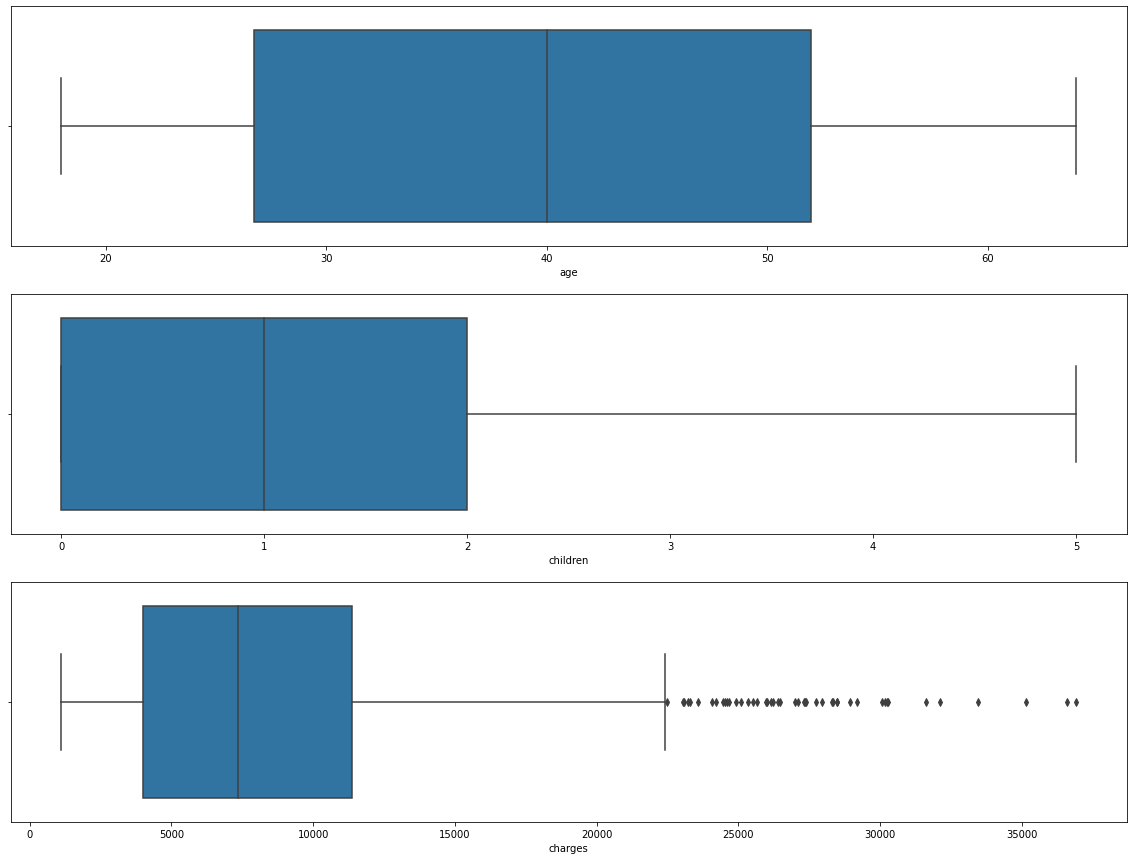

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(20,15))
df_numericas_no = df_no.select_dtypes(include=np.number)
for i in range(len(df_numericas_no.columns)):
    sns.boxplot(x = df_numericas_no.columns[i], data = df_numericas_no, ax=ax[i])
plt.show()

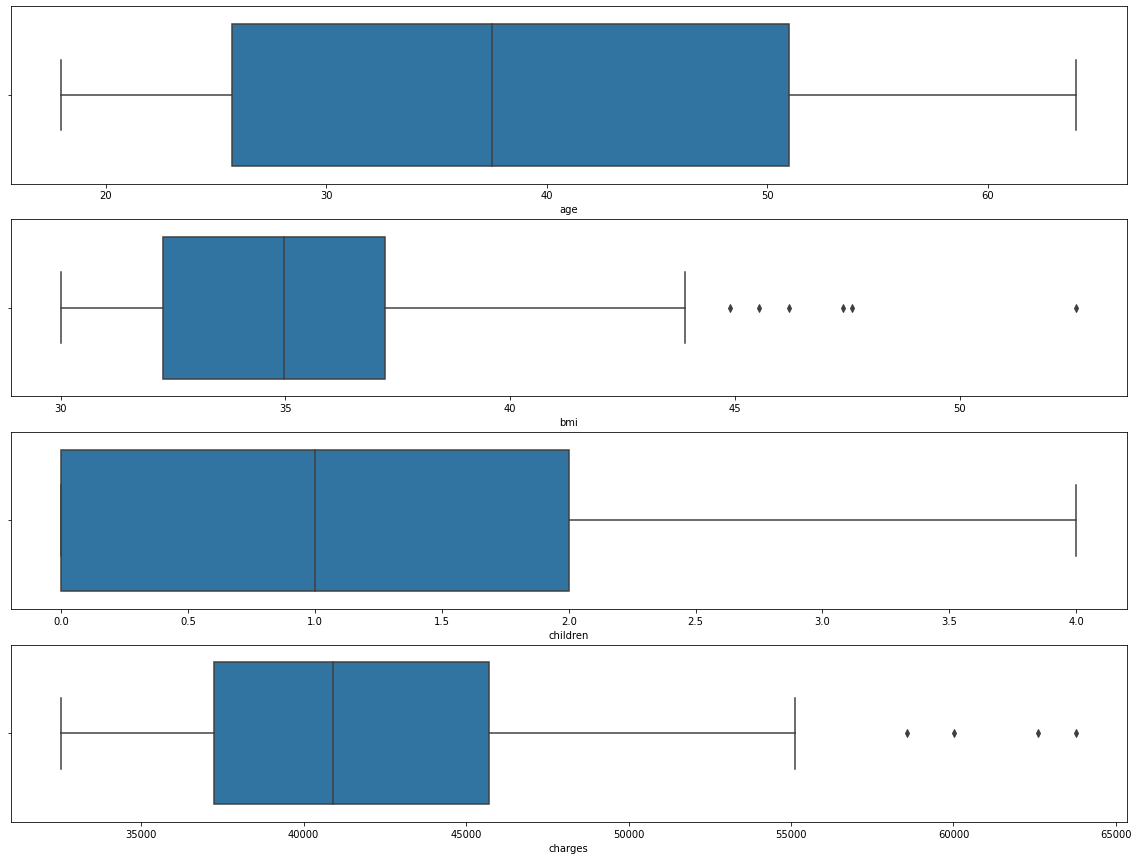

In [27]:
fig, ax = plt.subplots(4, 1, figsize=(20,15))
df_numericas_smo_hbmi = df_smo_hbmi.select_dtypes(include=np.number)
for i in range(len(df_numericas_smo_hbmi.columns)):
    sns.boxplot(x = df_numericas_smo_hbmi.columns[i], data = df_numericas_smo_hbmi, ax=ax[i])
plt.show()

In [28]:
Q1_smo_hbmi = np.nanpercentile(df_smo_hbmi['bmi'], 25)
Q3_smo_hbmi = np.nanpercentile(df_smo_hbmi['bmi'], 75)
IQR_smo_hbmi = Q3_smo_hbmi - Q1_smo_hbmi

outlier_step = 1.5 * IQR_smo_hbmi
outlier_step


7.398749999999996

In [29]:
outliers_data = df_smo_hbmi[(df_smo_hbmi["bmi"] < Q1_smo_hbmi - outlier_step) | (df_smo_hbmi["bmi"] > Q3_smo_hbmi + outlier_step)]
outliers_data

,age,bmi,children,charges
292,25,45.54,2,42112.23560
543,54,47.41,0,63770.42801
549,43,46.20,0,45863.20500
860,37,47.60,2,46113.51100
1047,22,52.58,1,44501.39820
1156,19,44.88,0,39722.74620


In [30]:
df_smo_hbmi.describe().T

,count,mean,std,min,25%,50%,75%,max
age,144.0,39.104167,14.361331,18.0000,25.75000,37.5000,51.000000,64.00000
bmi,144.0,35.544757,4.184624,30.0200,32.27500,34.9600,37.207500,52.58000
children,144.0,1.104167,1.113922,0.0000,0.00000,1.0000,2.000000,4.00000
charges,144.0,41692.808992,5829.158699,32548.3405,37243.90435,40918.3145,45704.068725,63770.42801


Creo que como solo son 5 outlayers y realmente no tienen valores muy alejados, me los voy a quedar.
También, no estoy tratando los outlayers de la columna charges, pero porque es lo que quiero identificar.

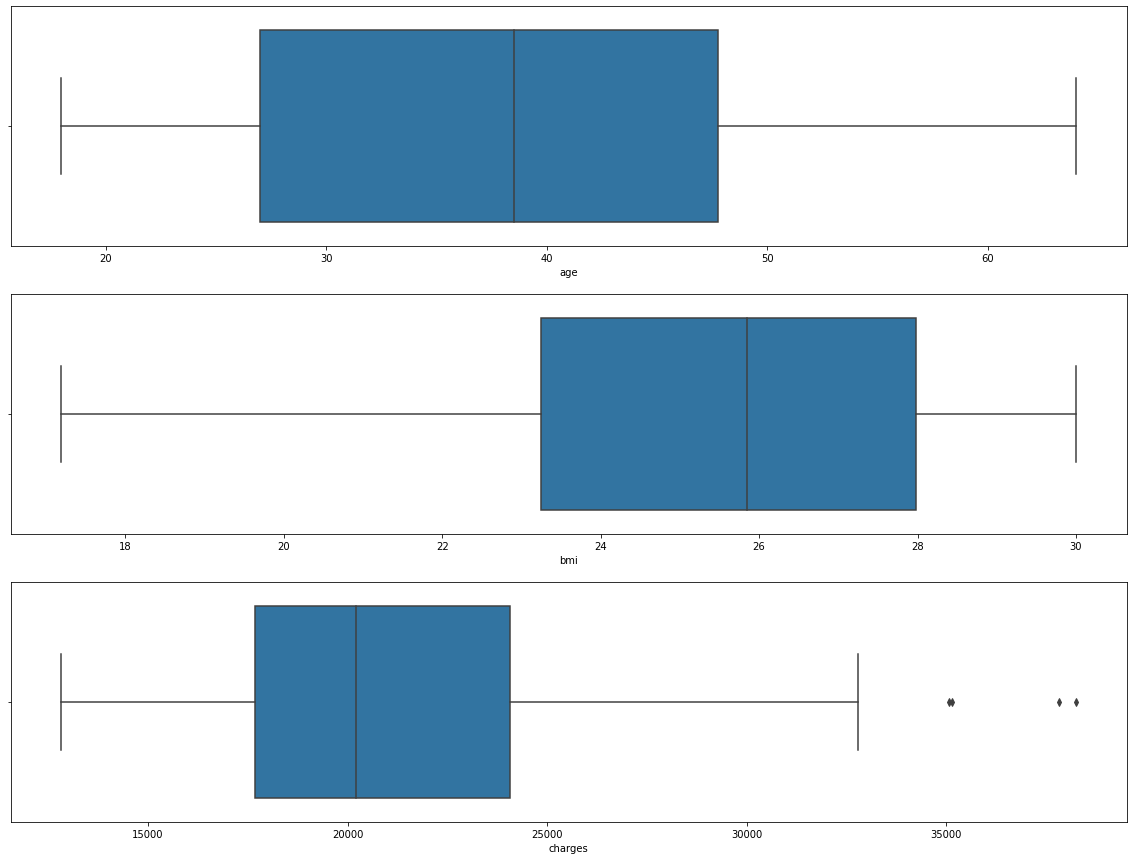

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(20,15))
df_numericas_smo_lbmi = df_smo_lbmi.select_dtypes(include=np.number)
for i in range(len(df_numericas_smo_lbmi.columns)):
    sns.boxplot(x = df_numericas_smo_lbmi.columns[i], data = df_numericas_smo_lbmi, ax=ax[i])
plt.show()

# Encoding
como estoy haciendo distintos modelos dependiendo de si es smoker o no, no tengo variables categóricas relevantes en mi dataframe, por lo que no necesito hacer encoding

# Normalización

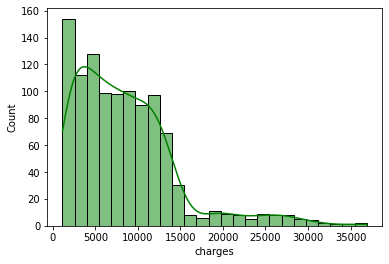

In [32]:
sns.histplot(df_no["charges"], 
             kde = True, 
             color = "green");

Esto es imposible normalizarlo, te pongas como te pongas

In [33]:
stats.shapiro(df_no["charges"])

ShapiroResult(statistic=0.8728628158569336, pvalue=1.4455900162299346e-28)

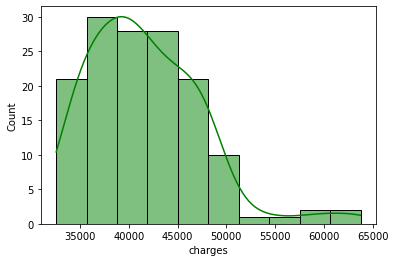

In [34]:
sns.histplot(df_smo_hbmi["charges"], 
             kde = True, 
             color = "green");

In [35]:
stats.shapiro(df_smo_hbmi["charges"])

ShapiroResult(statistic=0.9290722608566284, pvalue=1.3299760439622332e-06)

In [36]:
df_smo_hbmi['charges_LOG'] = df_smo_hbmi['charges'].apply(lambda x: np.log(x) if x != 0 else 0)


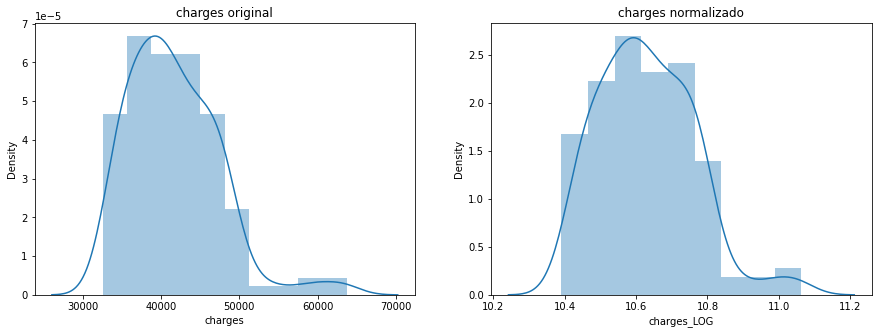

In [37]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(df_smo_hbmi['charges'] ,ax = axes[0])
sns.distplot(df_smo_hbmi['charges_LOG'], ax = axes[1]);

In [38]:
stats.shapiro(df_smo_hbmi["charges_LOG"])

ShapiroResult(statistic=0.9645255208015442, pvalue=0.0008796968031674623)

In [39]:
df_smo_hbmi["charges_box"] = boxcox(df_smo_hbmi["charges"])[0]

In [40]:
stats.shapiro(df_smo_hbmi["charges_box"])

ShapiroResult(statistic=1.0, pvalue=1.0)

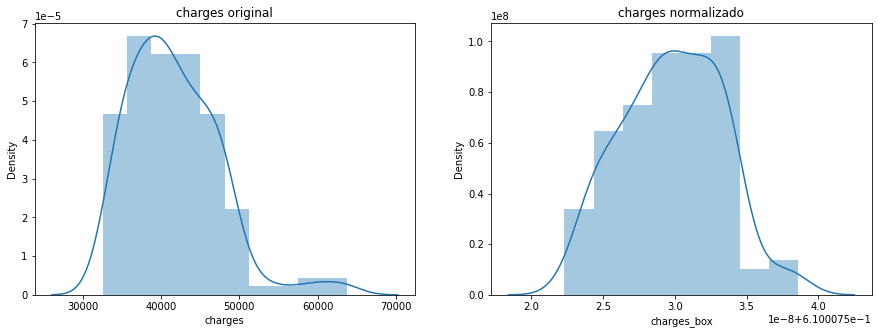

In [43]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(df_smo_hbmi['charges'] ,ax = axes[0])
sns.distplot(df_smo_hbmi['charges_box'], ax = axes[1]);

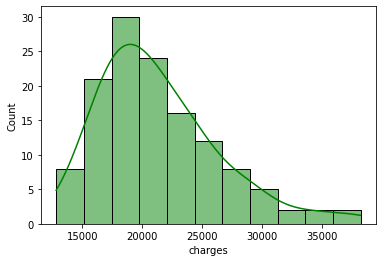

In [41]:
sns.histplot(df_smo_lbmi["charges"], 
             kde = True, 
             color = "green");

In [42]:
stats.shapiro(df_smo_lbmi["charges"])

ShapiroResult(statistic=0.933111846446991, pvalue=7.056971753627295e-06)

In [45]:
df_smo_lbmi["charges_box"] = boxcox(df_smo_lbmi["charges"])[0]
stats.shapiro(df_smo_lbmi["charges_box"])

ShapiroResult(statistic=0.9958946704864502, pvalue=0.9736326336860657)

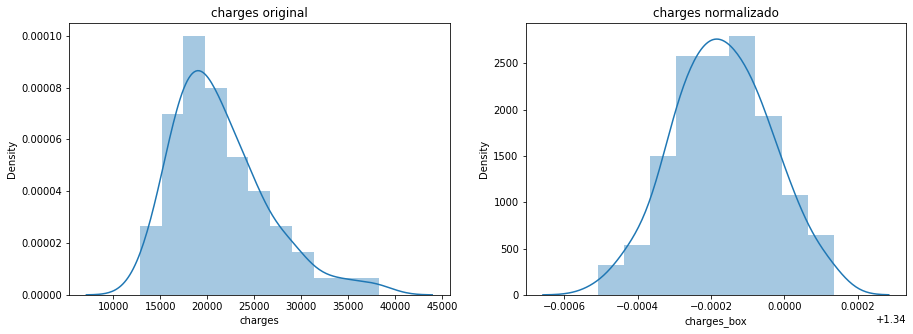

In [46]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(df_smo_lbmi['charges'] ,ax = axes[0])
sns.distplot(df_smo_lbmi['charges_box'], ax = axes[1]);

# Estandarización

In [50]:
robust_no = RobustScaler()
robust_hsmo = RobustScaler()
robust_lsmo = RobustScaler()

In [51]:
robust_no.fit(df_no[df_no.columns])
robust_hsmo.fit(df_smo_hbmi[df_smo_hbmi.columns])
robust_lsmo.fit(df_smo_lbmi[df_smo_lbmi.columns])

RobustScaler()

In [52]:
X_robust_no = robust_no.transform(df_no[df_no.columns])
X_robust_hsmo = robust_hsmo.transform(df_smo_hbmi[df_smo_hbmi.columns])
X_robust_lsmo = robust_lsmo.transform(df_smo_lbmi[df_smo_lbmi.columns])

In [53]:
df_no_esta = df_no.copy()
df_hsmo_esta = df_smo_hbmi.copy()
df_lsmo_esta = df_smo_lbmi.copy()

In [54]:
df_no_esta[df_no.columns] = X_robust_no
df_hsmo_esta[df_smo_hbmi.columns] = X_robust_hsmo
df_lsmo_esta[df_smo_lbmi.columns] = X_robust_lsmo

In [67]:
df_no_esta.head()

,age,children,charges
1,-0.871287,0.0,-0.761864
2,-0.475248,1.0,-0.392593
3,-0.277228,-0.5,1.984568
4,-0.316832,-0.5,-0.471575
5,-0.356436,-0.5,-0.486519


In [60]:
df_hsmo_esta.drop(["charges","charges_LOG"], axis = 1, inplace = True)

In [65]:
df_hsmo_esta.head()


,age,bmi,children,charges_box
14,-0.415842,1.453624,-0.5,-0.164272
19,-0.297030,0.068931,-0.5,-0.565076
23,-0.138614,-0.616320,0.0,-0.431823
29,-0.257426,0.271668,0.5,-0.286118
30,-0.613861,0.129752,-0.5,-0.773358


In [62]:
df_lsmo_esta.drop(["charges"], axis = 1, inplace = True)

In [66]:
df_lsmo_esta.head()

,age,bmi,charges_box
0,-0.939759,0.434002,-0.630679
11,1.132530,0.093981,0.934793
52,0.457831,0.455121,0.478727
58,0.698795,-0.626188,0.438022
64,-0.891566,-0.723337,-1.175925


# Ajuste de modelos, decision tree y random forest

In [70]:
X_no = df_no_esta.drop('charges', axis =1)
y_no = df_no_esta['charges']

X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no, y_no, train_size   = 0.8, random_state = 42)


X_hsmo = df_hsmo_esta.drop('charges_box', axis =1)
y_hsmo = df_hsmo_esta['charges_box']

X_train_hsmo, X_test_hsmo, y_train_hsmo, y_test_hsmo = train_test_split(X_hsmo, y_hsmo, train_size   = 0.8, random_state = 42)


X_lsmo = df_lsmo_esta.drop('charges_box', axis =1)
y_lsmo = df_lsmo_esta['charges_box']

X_train_lsmo, X_test_lsmo, y_train_lsmo, y_test_lsmo = train_test_split(X_lsmo, y_lsmo, train_size   = 0.8, random_state = 42)

In [71]:
lr_hsmo = LinearRegression()
lr_lsmo = LinearRegression()

In [72]:
lr_hsmo.fit(X_train_hsmo, y_train_hsmo)
lr_lsmo.fit(X_train_lsmo, y_train_lsmo)

LinearRegression()

In [75]:
y_pred_test_hsmo = lr_hsmo.predict(X_test_hsmo)
y_pred_train_hsmo = lr_hsmo.predict(X_train_hsmo)

y_pred_test_lsmo = lr_lsmo.predict(X_test_lsmo)
y_pred_train_lsmo = lr_lsmo.predict(X_train_lsmo)


In [76]:
train_df_hsmo = pd.DataFrame({'Real': y_train_hsmo, 'Predicted': y_pred_train_hsmo, 'Set': ['Train']*len(y_train_hsmo)})
test_df_hsmo  = pd.DataFrame({'Real': y_test_hsmo,  'Predicted': y_pred_test_hsmo,  'Set': ['Test']*len(y_test_hsmo)})
results_hsmo = pd.concat([train_df_hsmo,test_df_hsmo], axis = 0)
results_hsmo.head()

,Real,Predicted,Set
1146,1.014046,0.470655,Train
263,-0.665531,-0.638317,Train
951,0.649122,0.837721,Train
292,0.138461,0.134750,Train
109,0.615574,0.693243,Train


In [77]:
results_hsmo['residual'] = results_hsmo['Real'] - results_hsmo['Predicted']
results_hsmo.head()

,Real,Predicted,Set,residual
1146,1.014046,0.470655,Train,0.543391
263,-0.665531,-0.638317,Train,-0.027214
951,0.649122,0.837721,Train,-0.188599
292,0.138461,0.134750,Train,0.003711
109,0.615574,0.693243,Train,-0.077669


In [78]:
train_df_lsmo = pd.DataFrame({'Real': y_train_lsmo, 'Predicted': y_pred_train_lsmo, 'Set': ['Train']*len(y_train_lsmo)})
test_df_lsmo  = pd.DataFrame({'Real': y_test_lsmo,  'Predicted': y_pred_test_lsmo,  'Set': ['Test']*len(y_test_lsmo)})
results_lsmo = pd.concat([train_df_lsmo,test_df_lsmo], axis = 0)
results_lsmo.head()

,Real,Predicted,Set
780,-0.345064,-0.299607,Train
854,0.544385,0.395703,Train
474,0.690099,0.669219,Train
0,-0.630679,-0.496740,Train
105,-0.485424,-0.450179,Train


In [79]:
results_lsmo['residual'] = results_lsmo['Real'] - results_lsmo['Predicted']
results_lsmo.head()

,Real,Predicted,Set,residual
780,-0.345064,-0.299607,Train,-0.045456
854,0.544385,0.395703,Train,0.148683
474,0.690099,0.669219,Train,0.020880
0,-0.630679,-0.496740,Train,-0.133939
105,-0.485424,-0.450179,Train,-0.035245


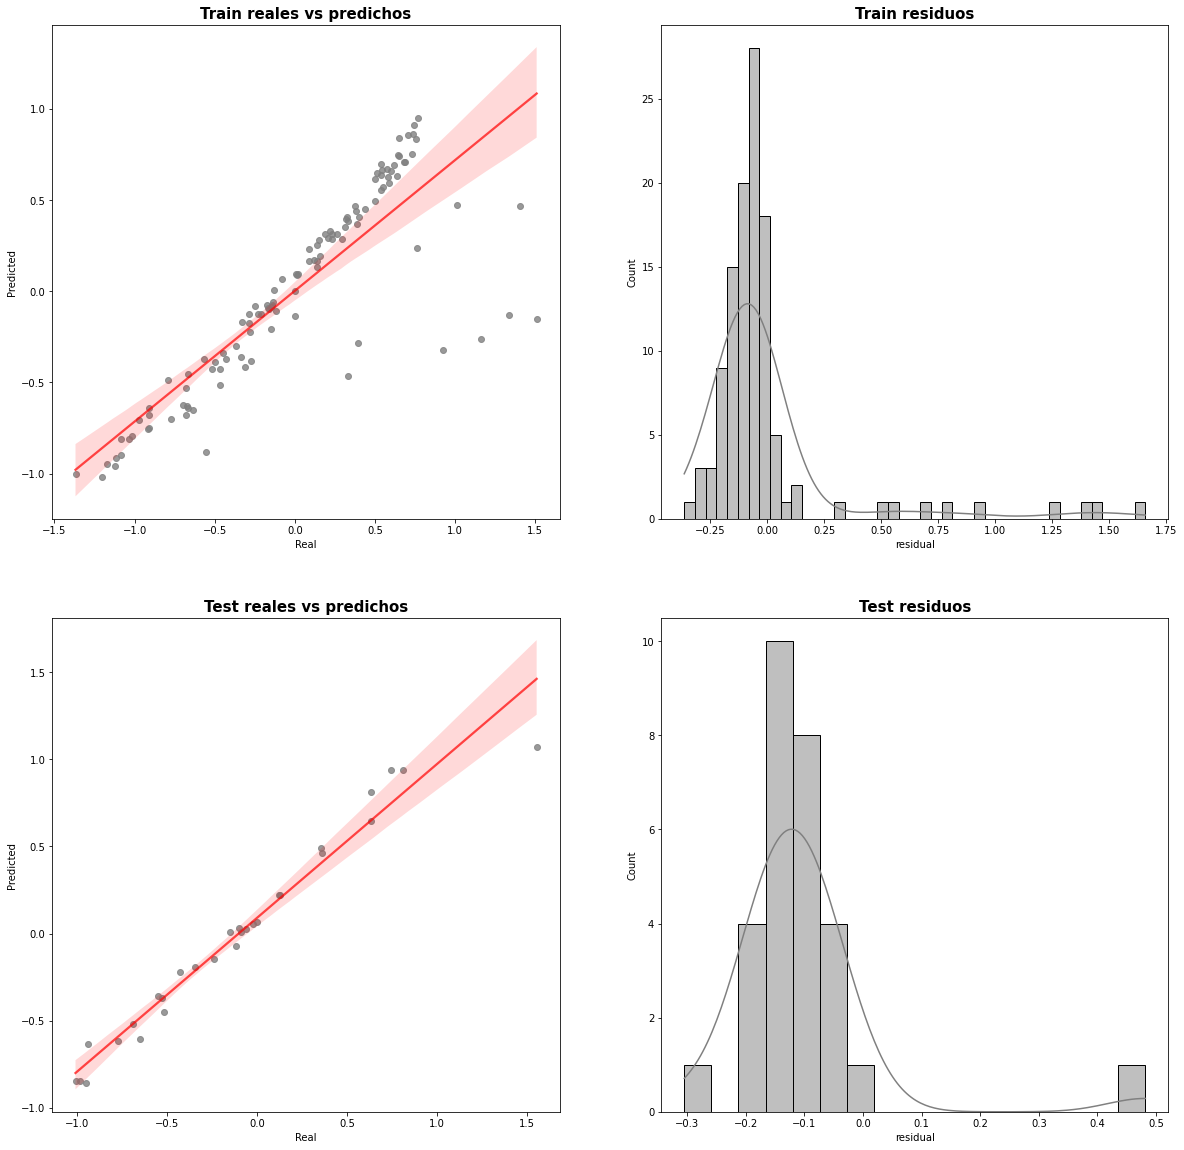

In [80]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = results_hsmo[results_hsmo['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = results_hsmo[results_hsmo['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(results_hsmo[results_hsmo['Set'] == "Train"],
             x="residual",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(results_hsmo[results_hsmo['Set'] == "Test"],
             x="residual",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

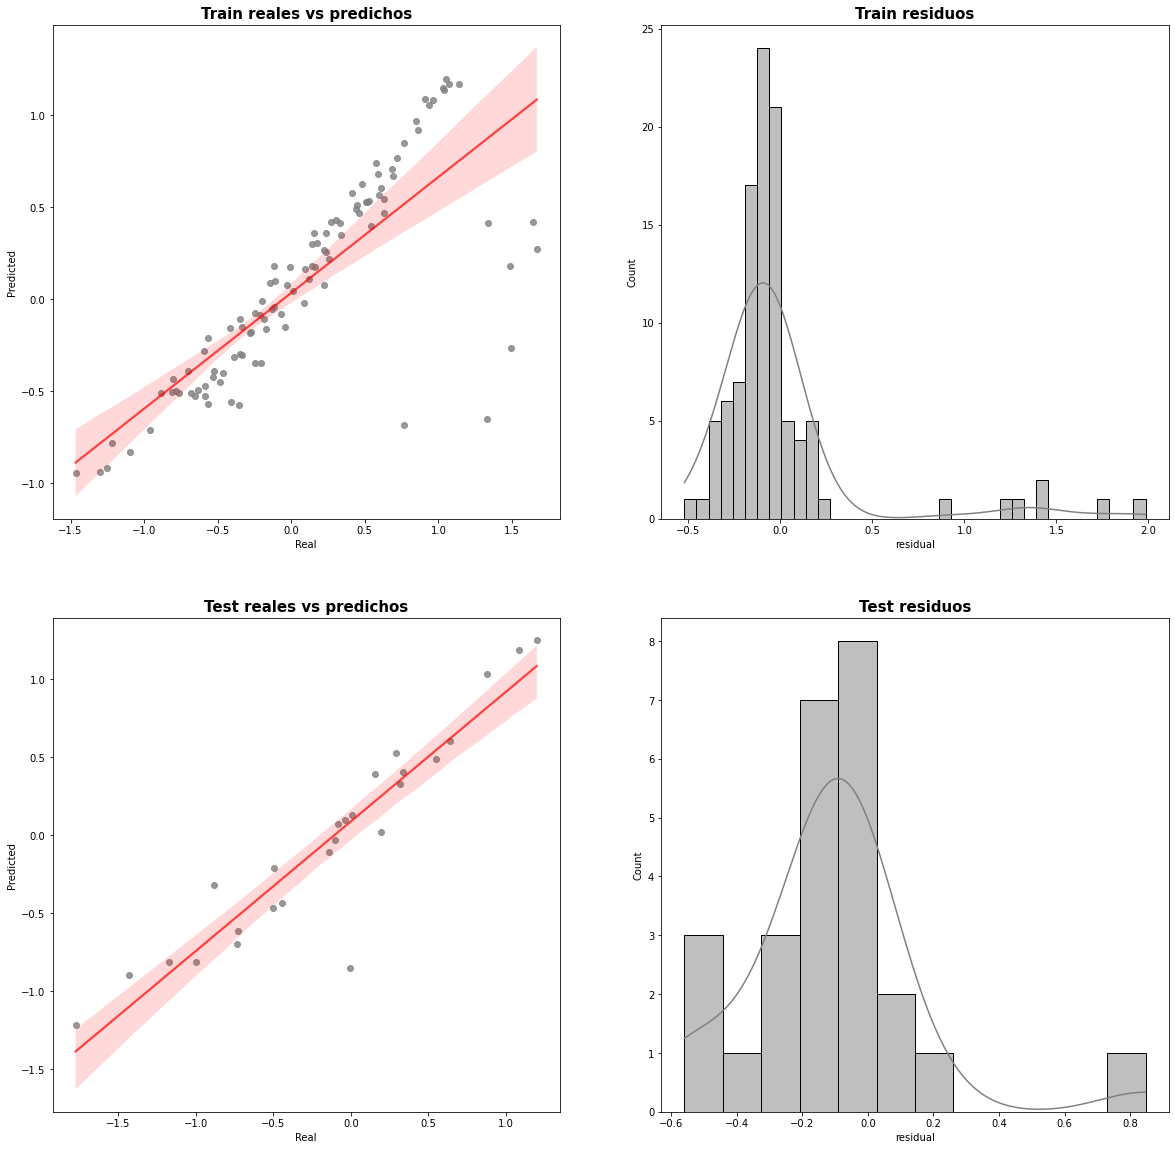

In [81]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = results_lsmo[results_lsmo['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = results_lsmo[results_lsmo['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(results_lsmo[results_lsmo['Set'] == "Train"],
             x="residual",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(results_lsmo[results_lsmo['Set'] == "Test"],
             x="residual",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [82]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [99]:
lr_hsmo_results = metricas(y_test_hsmo, y_train_hsmo, y_pred_test_hsmo, y_pred_train_hsmo, "Regresion lineal")
lr_hsmo_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.137879,0.026674,0.163322,0.927989,test,Regresion lineal
1,0.176247,0.111112,0.333334,0.716750,train,Regresion lineal


In [86]:
lr_lsmo_results = metricas(y_test_lsmo, y_train_lsmo, y_pred_test_lsmo, y_pred_train_lsmo, "Regresion lineal")
lr_lsmo_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.199426,0.082502,0.287231,0.847606,test,Regresion lineal
1,0.222212,0.173362,0.416368,0.628910,train,Regresion lineal


In [96]:
cv_scores = cross_val_score(
                estimator = LinearRegression(),
                X         = X_hsmo,
                y         = y_hsmo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 10
             )
print(f"Métricas validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-0.34462409 -0.08660863 -0.12257711 -0.23258258 -0.4649659  -0.44423169
 -0.11512644 -0.16086305 -0.20784868 -0.54261335]
Média métricas de validación cruzada: -0.27220415318658225


In [98]:
cv_scores = cross_val_score(
                estimator = LinearRegression(),
                X         = X_lsmo,
                y         = y_lsmo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 10
             )
print(f"Métricas validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-0.2077321  -0.61171013 -0.26387184 -0.52611977 -0.48421235 -0.16827877
 -0.41650751 -0.20053707 -0.51712332 -0.39110358]
Média métricas de validación cruzada: -0.37871964220412446


In [100]:
regressor_no = DecisionTreeRegressor(random_state = 0) 
regressor_hsmo = DecisionTreeRegressor(random_state = 0) 
regressor_lsmo = DecisionTreeRegressor(random_state = 0) 

In [101]:
regressor_no.fit(X_train_no, y_train_no)
regressor_hsmo.fit(X_train_hsmo, y_train_hsmo)
regressor_lsmo.fit(X_train_lsmo, y_train_lsmo)

DecisionTreeRegressor(random_state=0)

In [103]:
max_features_no = np.sqrt(len(X_train_no.columns))
max_features_hsmo = np.sqrt(len(X_train_hsmo.columns))
max_features_lsmo= np.sqrt(len(X_train_lsmo.columns))

print(f"Features máximas teóricas son no: {max_features_no}, hsmo: {max_features_hsmo}, lsmo: {max_features_lsmo}")

Features máximas teóricas son no: 1.4142135623730951, hsmo: 1.7320508075688772, lsmo: 1.4142135623730951


In [107]:
print(f" profundidad máxima para no:{regressor_no.tree_.max_depth}, hsmo:{regressor_hsmo.tree_.max_depth}, lsmo: {regressor_lsmo.tree_.max_depth}")

 profundidad máxima para no:14, hsmo:11, lsmo: 12


In [113]:
param = {"max_depth": [3, 4, 5, 6, 7, 8],
        "min_samples_split": [25, 50, 75, 100],
        "min_samples_leaf": [10, 20, 30, 50, 75, 100],
        "max_features": [1, 2, 3]}

gs_no = GridSearchCV(
            estimator = DecisionTreeRegressor(),
            param_grid = param,
            cv = 10,
            verbose = 0,
            n_jobs = -1,
            return_train_score = True,
            scoring = "neg_mean_squared_error")

In [114]:
%time
gs_no.fit(X_train_no, y_train_no)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [10, 20, 30, 50, 75, 100],
                         'min_samples_split': [25, 50, 75, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [117]:
best_tree_no = gs_no.best_estimator_
best_tree_no

DecisionTreeRegressor(max_depth=4, max_features=2, min_samples_leaf=20,
                      min_samples_split=25)

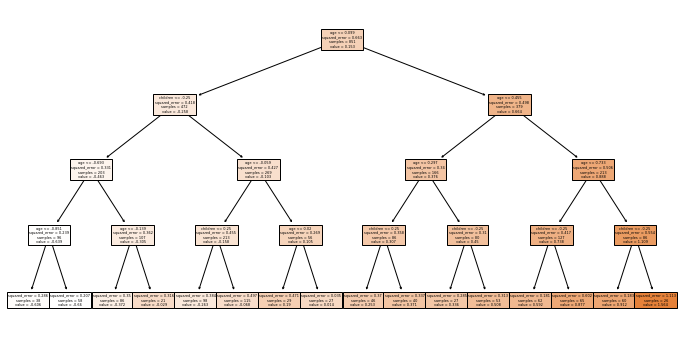

In [118]:
fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree_no, feature_names = X_train_no.columns, filled=True);

In [120]:
param = {"max_depth": [3, 4, 5, 6, 7],
        "min_samples_split": [25, 50, 75, 100],
        "min_samples_leaf": [10, 20, 30, 50, 75, 100],
        "max_features": [1, 2, 3]}

gs_hsmo = GridSearchCV(
            estimator = DecisionTreeRegressor(),
            param_grid = param,
            cv = 10,
            verbose = 0,
            n_jobs = -1,
            return_train_score = True,
            scoring = "neg_mean_squared_error")

In [121]:
%time
gs_hsmo.fit(X_train_hsmo, y_train_hsmo)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [10, 20, 30, 50, 75, 100],
                         'min_samples_split': [25, 50, 75, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [123]:
best_tree_hsmo = gs_hsmo.best_estimator_
best_tree_hsmo

DecisionTreeRegressor(max_depth=6, max_features=3, min_samples_leaf=10,
                      min_samples_split=25)

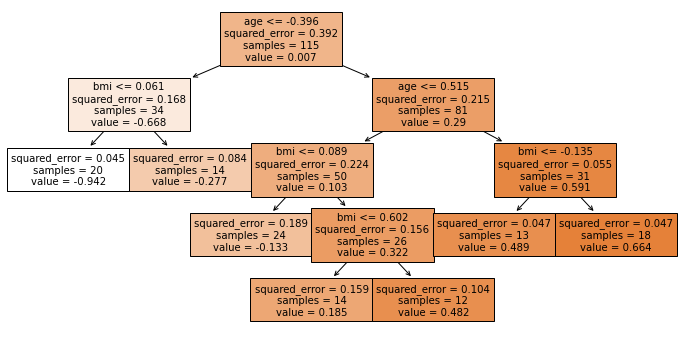

In [124]:
fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree_hsmo, feature_names = X_train_hsmo.columns, filled=True);

In [125]:
param = {"max_depth": [3, 4, 5, 6, 7],
        "min_samples_split": [25, 50, 75, 100],
        "min_samples_leaf": [10, 20, 30, 50, 75, 100],
        "max_features": [1, 2, 3]}

gs_lsmo = GridSearchCV(
            estimator = DecisionTreeRegressor(),
            param_grid = param,
            cv = 10,
            verbose = 0,
            n_jobs = -1,
            return_train_score = True,
            scoring = "neg_mean_squared_error")

In [126]:
%time
gs_lsmo.fit(X_train_lsmo, y_train_lsmo)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [10, 20, 30, 50, 75, 100],
                         'min_samples_split': [25, 50, 75, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [127]:
best_tree_lsmo = gs_lsmo.best_estimator_
best_tree_lsmo

DecisionTreeRegressor(max_depth=3, max_features=2, min_samples_leaf=20,
                      min_samples_split=25)

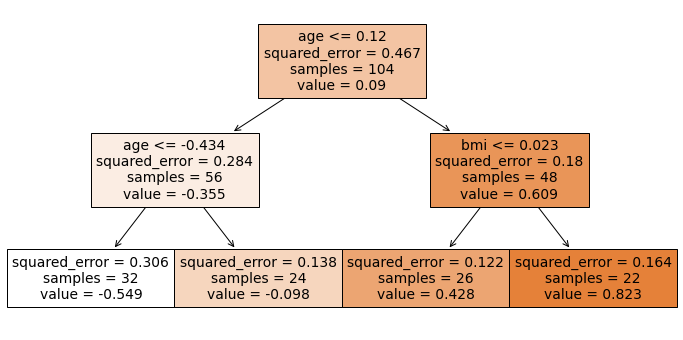

In [128]:
fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree_lsmo, feature_names = X_train_lsmo.columns, filled=True);

In [129]:
y_pred_test_dt_no = best_tree_no.predict(X_test_no)
y_pred_train_dt_no = best_tree_no.predict(X_train_no)

y_pred_test_dt_hsmo = best_tree_hsmo.predict(X_test_hsmo)
y_pred_train_dt_hsmo = best_tree_hsmo.predict(X_train_hsmo)

y_pred_test_dt_lsmo = best_tree_lsmo.predict(X_test_lsmo)
y_pred_train_dt_lsmo = best_tree_lsmo.predict(X_train_lsmo)

In [130]:
dt_results_no = metricas(y_test_no, y_train_no, y_pred_test_dt_no, y_pred_train_dt_no, "Decision tree")

dt_results_hsmo = metricas(y_test_hsmo, y_train_hsmo, y_pred_test_dt_hsmo, y_pred_train_dt_hsmo, "Decision tree")

dt_results_lsmo = metricas(y_test_lsmo, y_train_lsmo, y_pred_test_dt_lsmo, y_pred_train_dt_lsmo, "Decision tree")

In [131]:
dt_results_no

,MAE,MSE,RMSE,R2,set,modelo
0,0.342907,0.375429,0.612723,0.418150,test,Decision tree
1,0.334894,0.369148,0.607576,0.443305,train,Decision tree


In [132]:
comparativa_hsmo = pd.concat([lr_hsmo_results, dt_results_hsmo], axis = 0)
comparativa_hsmo

,MAE,MSE,RMSE,R2,set,modelo
0,0.137879,0.026674,0.163322,0.927989,test,Regresion lineal
1,0.176247,0.111112,0.333334,0.716750,train,Regresion lineal
0,0.258771,0.127460,0.357016,0.655901,test,Decision tree
1,0.216466,0.100449,0.316937,0.743931,train,Decision tree


In [133]:
comparativa_lsmo = pd.concat([lr_lsmo_results, dt_results_lsmo], axis = 0)
comparativa_lsmo

,MAE,MSE,RMSE,R2,set,modelo
0,0.199426,0.082502,0.287231,0.847606,test,Regresion lineal
1,0.222212,0.173362,0.416368,0.628910,train,Regresion lineal
0,0.367042,0.215960,0.464715,0.601086,test,Decision tree
1,0.305055,0.191301,0.437380,0.590511,train,Decision tree


In [134]:
importancia_predictores_no = pd.DataFrame(
                            {'predictor': X_train_no.columns,
                             'importancia': regressor_no.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_no

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.852482
1,children,0.147518


In [136]:
importancia_predictores_hsmo = pd.DataFrame(
                            {'predictor': X_train_hsmo.columns,
                             'importancia': regressor_hsmo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_hsmo

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.675579
1,bmi,0.279197
2,children,0.045224


In [135]:
importancia_predictores_lsmo = pd.DataFrame(
                            {'predictor': X_train_lsmo.columns,
                             'importancia': regressor_lsmo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_lsmo

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.689251
1,bmi,0.310749


In [138]:
param = {"max_depth": [3, 4, 5, 6, 7, 8],
        "min_samples_split": [25, 50, 75, 100],
        "min_samples_leaf": [10, 20, 30, 50, 75, 100],
        "max_features": [1, 2, 3]}

bosque_no = GridSearchCV(
            estimator = RandomForestRegressor(),
            param_grid = param,
            cv = 10,
            verbose = 0,
            n_jobs = -1,
            return_train_score = True,
            scoring = "neg_mean_squared_error")

In [139]:
param = {"max_depth": [3, 4, 5, 6, 7],
        "min_samples_split": [25, 50, 75, 100],
        "min_samples_leaf": [10, 20, 30, 50, 75, 100],
        "max_features": [1, 2, 3]}

bosque_hsmo = GridSearchCV(
            estimator = RandomForestRegressor(),
            param_grid = param,
            cv = 10,
            verbose = 0,
            n_jobs = -1,
            return_train_score = True,
            scoring = "neg_mean_squared_error")

In [140]:
param = {"max_depth": [3, 4, 5, 6, 7],
        "min_samples_split": [25, 50, 75, 100],
        "min_samples_leaf": [10, 20, 30, 50, 75, 100],
        "max_features": [1, 2, 3]}

bosque_lsmo = GridSearchCV(
            estimator = RandomForestRegressor(),
            param_grid = param,
            cv = 10,
            verbose = 0,
            n_jobs = -1,
            return_train_score = True,
            scoring = "neg_mean_squared_error")

In [141]:
%time
bosque_no.fit(X_train_no, y_train_no)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [10, 20, 30, 50, 75, 100],
                         'min_samples_split': [25, 50, 75, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [142]:
bos_no = bosque_no.best_estimator_
bos_no

RandomForestRegressor(max_depth=4, max_features=1, min_samples_leaf=10,
                      min_samples_split=25)

In [148]:
y_pred_test_rf_no = bos_no.predict(X_test_no)
y_pred_train_rf_no = bos_no.predict(X_train_no)


In [150]:
rf_no_results = metricas(y_test_no, y_train_no, y_pred_test_rf_no, y_pred_train_rf_no, "Random Forest")
comparativa_no = pd.concat([dt_results_no, rf_no_results], axis= 0)
comparativa_no

,MAE,MSE,RMSE,R2,set,modelo
0,0.342907,0.375429,0.612723,0.418150,test,Decision tree
1,0.334894,0.369148,0.607576,0.443305,train,Decision tree
0,0.332032,0.352123,0.593399,0.454271,test,Random Forest
1,0.331194,0.368696,0.607203,0.443988,train,Random Forest


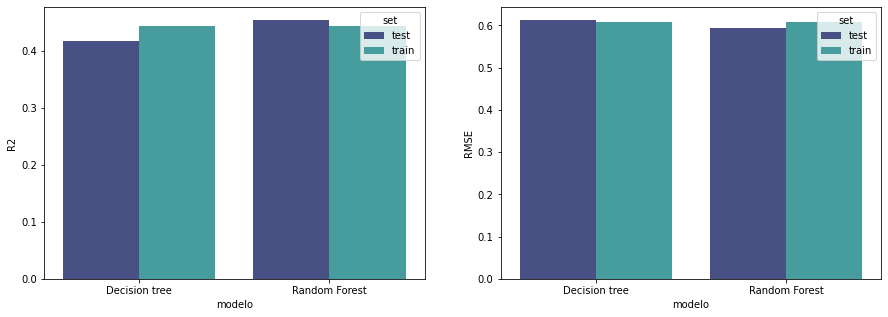

In [165]:
fig, axes = plt.subplots(1,2, figsize =(15,5))

sns.barplot(data = comparativa_no, x = "modelo", y = "R2", hue = "set", ax = axes[0], palette="mako")
sns.barplot(data = comparativa_no, x = "modelo", y = "RMSE", hue = "set",ax = axes[1], palette = "mako");

In [143]:
%time
bosque_hsmo.fit(X_train_hsmo, y_train_hsmo)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [10, 20, 30, 50, 75, 100],
                         'min_samples_split': [25, 50, 75, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [144]:
bos_hsmo = bosque_hsmo.best_estimator_
bos_hsmo

RandomForestRegressor(max_depth=7, max_features=3, min_samples_leaf=10,
                      min_samples_split=25)

In [152]:
y_pred_test_rf_hsmo = bos_hsmo.predict(X_test_hsmo)
y_pred_train_rf_hsmo = bos_hsmo.predict(X_train_hsmo)

In [158]:
rf_hsmo_results = metricas(y_test_hsmo, y_train_hsmo, y_pred_test_rf_hsmo, y_pred_train_rf_hsmo, "Random Forest")
comparativa_hsmo = pd.concat([lr_hsmo_results, dt_results_hsmo, rf_hsmo_results], axis= 0)
comparativa_hsmo

,MAE,MSE,RMSE,R2,set,modelo
0,0.137879,0.026674,0.163322,0.927989,test,Regresion lineal
1,0.176247,0.111112,0.333334,0.716750,train,Regresion lineal
0,0.258771,0.127460,0.357016,0.655901,test,Decision tree
1,0.216466,0.100449,0.316937,0.743931,train,Decision tree
0,0.219011,0.086684,0.294421,0.765983,test,Random Forest
1,0.229583,0.112465,0.335358,0.713300,train,Random Forest


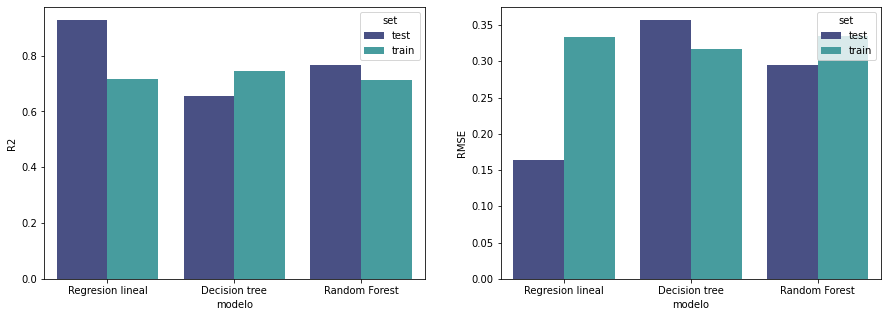

In [164]:
fig, axes = plt.subplots(1,2, figsize =(15,5))

sns.barplot(data = comparativa_hsmo, x = "modelo", y = "R2", hue = "set", ax = axes[0], palette="mako")
sns.barplot(data = comparativa_hsmo, x = "modelo", y = "RMSE", hue = "set",ax = axes[1], palette = "mako");

In [145]:
%time
bosque_lsmo.fit(X_train_lsmo, y_train_lsmo)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [10, 20, 30, 50, 75, 100],
                         'min_samples_split': [25, 50, 75, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [146]:
bos_lsmo = bosque_lsmo.best_estimator_
bos_lsmo

RandomForestRegressor(max_depth=3, max_features=2, min_samples_leaf=10,
                      min_samples_split=25)

In [155]:
y_pred_test_rf_lsmo = bos_lsmo.predict(X_test_lsmo)
y_pred_train_rf_lsmo = bos_lsmo.predict(X_train_lsmo)

In [159]:
rf_lsmo_results = metricas(y_test_lsmo, y_train_lsmo, y_pred_test_rf_lsmo, y_pred_train_rf_lsmo, "Random Forest")
comparativa_lsmo = pd.concat([lr_lsmo_results, dt_results_lsmo, rf_lsmo_results], axis= 0)
comparativa_lsmo

,MAE,MSE,RMSE,R2,set,modelo
0,0.199426,0.082502,0.287231,0.847606,test,Regresion lineal
1,0.222212,0.173362,0.416368,0.628910,train,Regresion lineal
0,0.367042,0.215960,0.464715,0.601086,test,Decision tree
1,0.305055,0.191301,0.437380,0.590511,train,Decision tree
0,0.315850,0.171836,0.414531,0.682591,test,Random Forest
1,0.267197,0.172216,0.414990,0.631363,train,Random Forest


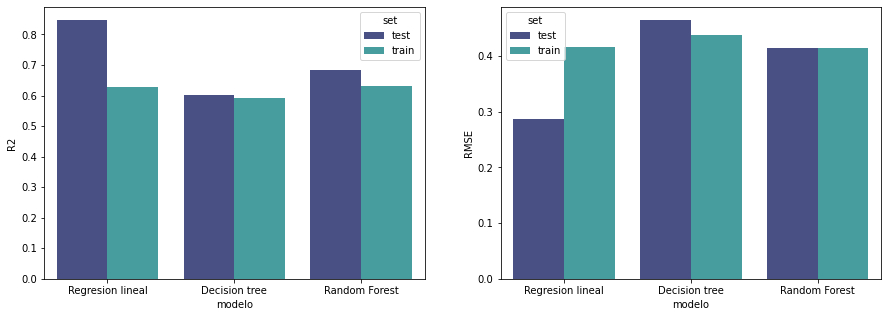

In [160]:
fig, axes = plt.subplots(1,2, figsize =(15,5))

sns.barplot(data = comparativa_lsmo, x = "modelo", y = "R2", hue = "set", ax = axes[0], palette="mako")
sns.barplot(data = comparativa_lsmo, x = "modelo", y = "RMSE", hue = "set",ax = axes[1], palette = "mako");